In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100

In [2]:
df_csv = pd.read_csv('measurements.csv')
df_excel = pd.read_excel('measurements2.xlsx')

In [3]:
df_csv

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [4]:
nulls_df = pd.DataFrame(round(df_csv.isna().sum()/len(df_csv),12)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,distance,0.000000
1,consume,0.000000
2,speed,0.000000
3,temp_inside,3.092784
4,temp_outside,0.000000
5,specials,76.030928
6,gas_type,0.000000
7,AC,0.000000
8,rain,0.000000
9,sun,0.000000


In [5]:
df_excel

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [6]:
nulls_df = pd.DataFrame(round(df_excel.isna().sum()/len(df_excel),12)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,distance,0.000000
1,consume,0.000000
2,speed,0.000000
3,temp_inside,3.092784
4,temp_outside,0.000000
5,specials,76.030928
6,gas_type,0.000000
7,AC,0.000000
8,rain,0.000000
9,sun,0.000000


In [7]:
# same dataset 
#continue with df_csv
df_csv = df_csv.drop(columns=['specials', 'refill liters', 'refill gas']).reset_index(drop=True)


In [8]:
df_csv['temp_inside'] = df_csv['temp_inside'].fillna(df_csv['temp_inside'].mean)
df_csv 

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,"21,5",12,E10,0,0,0
1,12,"4,2",30,"21,5",13,E10,0,0,0
2,"11,2","5,5",38,"21,5",15,E10,0,0,0
3,"12,9","3,9",36,"21,5",14,E10,0,0,0
4,"18,5","4,5",46,"21,5",15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,SP98,0,0,0
384,"16,1","4,3",38,25,31,SP98,1,0,0
385,16,"3,8",45,25,19,SP98,0,0,0
386,"15,4","4,6",42,25,31,SP98,1,0,0


In [9]:
nulls_df = pd.DataFrame(round(df_csv.isna().sum()/len(df_csv),12)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,distance,0.0
1,consume,0.0
2,speed,0.0
3,temp_inside,0.0
4,temp_outside,0.0
5,gas_type,0.0
6,AC,0.0
7,rain,0.0
8,sun,0.0


In [10]:
df_encoded = pd.get_dummies(df_csv, columns=['gas_type'])

In [11]:
df_encoded

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_E10,gas_type_SP98
0,28,5,26,"21,5",12,0,0,0,1,0
1,12,"4,2",30,"21,5",13,0,0,0,1,0
2,"11,2","5,5",38,"21,5",15,0,0,0,1,0
3,"12,9","3,9",36,"21,5",14,0,0,0,1,0
4,"18,5","4,5",46,"21,5",15,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,0,0,0,0,1
384,"16,1","4,3",38,25,31,1,0,0,0,1
385,16,"3,8",45,25,19,0,0,0,0,1
386,"15,4","4,6",42,25,31,1,0,0,0,1


In [12]:
df_encoded.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
AC                int64
rain              int64
sun               int64
gas_type_E10      uint8
gas_type_SP98     uint8
dtype: object

In [13]:
df_encoded['distance'] = df_encoded['distance'].str.replace(' ', '')
df_encoded['consume'] = df_encoded['consume'].str.replace(' ', '')
df_encoded['temp_inside'] = df_encoded['temp_inside'].str.replace(' ', '')

df_encoded['distance'] = df_encoded['distance'].str.replace(',', '.')
df_encoded['consume'] = df_encoded['consume'].str.replace(',', '.')
df_encoded['temp_inside'] = df_encoded['temp_inside'].str.replace(',', '.')

df_encoded['distance'] = pd.to_numeric(df_encoded['distance'])
df_encoded['consume'] = pd.to_numeric(df_encoded['consume'])
df_encoded['temp_inside'] = pd.to_numeric(df_encoded['temp_inside'])

In [14]:
df_encoded = df_encoded.astype(float)
df_encoded


,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_E10,gas_type_SP98
0,28.0,5.0,26.0,21.5,12.0,0.0,0.0,0.0,1.0,0.0
1,12.0,4.2,30.0,21.5,13.0,0.0,0.0,0.0,1.0,0.0
2,11.2,5.5,38.0,21.5,15.0,0.0,0.0,0.0,1.0,0.0
3,12.9,3.9,36.0,21.5,14.0,0.0,0.0,0.0,1.0,0.0
4,18.5,4.5,46.0,21.5,15.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39.0,24.5,18.0,0.0,0.0,0.0,0.0,1.0
384,16.1,4.3,38.0,25.0,31.0,1.0,0.0,0.0,0.0,1.0
385,16.0,3.8,45.0,25.0,19.0,0.0,0.0,0.0,0.0,1.0
386,15.4,4.6,42.0,25.0,31.0,1.0,0.0,0.0,0.0,1.0


In [65]:
df_encoded['speed_per_min'] = df_encoded['speed']/60
df_encoded['avg_km/h'] = df_encoded['distance']/df_encoded['speed_per_min']
df_encoded['gas_usage'] = df_encoded['consume']/100*df_encoded['distance']
df_encoded['gas_usage_per_km'] = df_encoded['consume']/100

df_encoded

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_E10,gas_type_SP98,gas_usage,cost_per_ride,gas_usage_per_km,speed_per_min,avg_km/h
0,28.0,5.0,26.0,21.5,12.0,0.0,0.0,0.0,1.0,0.0,1.4000,1.932000,0.050,0.433333,64.615385
1,12.0,4.2,30.0,21.5,13.0,0.0,0.0,0.0,1.0,0.0,0.5040,0.695520,0.042,0.500000,24.000000
2,11.2,5.5,38.0,21.5,15.0,0.0,0.0,0.0,1.0,0.0,0.6160,0.850080,0.055,0.633333,17.684211
3,12.9,3.9,36.0,21.5,14.0,0.0,0.0,0.0,1.0,0.0,0.5031,0.694278,0.039,0.600000,21.500000
4,18.5,4.5,46.0,21.5,15.0,0.0,0.0,0.0,1.0,0.0,0.8325,1.148850,0.045,0.766667,24.130435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39.0,24.5,18.0,0.0,0.0,0.0,0.0,1.0,0.5920,0.864320,0.037,0.650000,24.615385
384,16.1,4.3,38.0,25.0,31.0,1.0,0.0,0.0,0.0,1.0,0.6923,1.010758,0.043,0.633333,25.421053
385,16.0,3.8,45.0,25.0,19.0,0.0,0.0,0.0,0.0,1.0,0.6080,0.887680,0.038,0.750000,21.333333
386,15.4,4.6,42.0,25.0,31.0,1.0,0.0,0.0,0.0,1.0,0.7084,1.034264,0.046,0.700000,22.000000


In [66]:
#E10 is sold for 1,38€; SP98 is sold for 1,46€; per liter.
def calculate_cost_per_ride(row):
    if row['gas_type_E10'] == 1:
        return 1.38 * row['gas_usage']
    else:
        return 1.46 * row['gas_usage']
    
df_encoded['cost_per_ride'] = df_encoded.apply(calculate_cost_per_ride, axis=1)
df_encoded

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_E10,gas_type_SP98,gas_usage,cost_per_ride,gas_usage_per_km,speed_per_min,avg_km/h
0,28.0,5.0,26.0,21.5,12.0,0.0,0.0,0.0,1.0,0.0,1.4000,1.932000,0.050,0.433333,64.615385
1,12.0,4.2,30.0,21.5,13.0,0.0,0.0,0.0,1.0,0.0,0.5040,0.695520,0.042,0.500000,24.000000
2,11.2,5.5,38.0,21.5,15.0,0.0,0.0,0.0,1.0,0.0,0.6160,0.850080,0.055,0.633333,17.684211
3,12.9,3.9,36.0,21.5,14.0,0.0,0.0,0.0,1.0,0.0,0.5031,0.694278,0.039,0.600000,21.500000
4,18.5,4.5,46.0,21.5,15.0,0.0,0.0,0.0,1.0,0.0,0.8325,1.148850,0.045,0.766667,24.130435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39.0,24.5,18.0,0.0,0.0,0.0,0.0,1.0,0.5920,0.864320,0.037,0.650000,24.615385
384,16.1,4.3,38.0,25.0,31.0,1.0,0.0,0.0,0.0,1.0,0.6923,1.010758,0.043,0.633333,25.421053
385,16.0,3.8,45.0,25.0,19.0,0.0,0.0,0.0,0.0,1.0,0.6080,0.887680,0.038,0.750000,21.333333
386,15.4,4.6,42.0,25.0,31.0,1.0,0.0,0.0,0.0,1.0,0.7084,1.034264,0.046,0.700000,22.000000


In [37]:
df_check = df_encoded[['gas_usage', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain', 'sun','cost_per_ride' ]]


<Axes: >

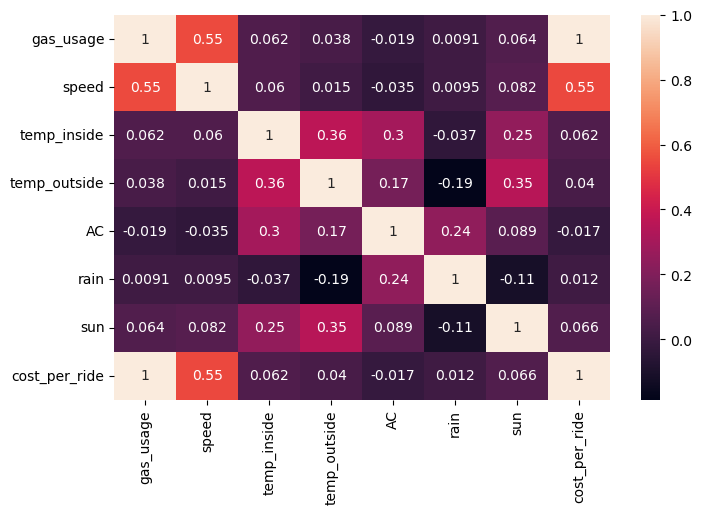

In [67]:
fig = plt.figure(figsize = (8,5))
sns.heatmap(df_check.corr(), annot=True)

In [68]:
df_encoded.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_E10,gas_type_SP98,gas_usage,cost_per_ride,gas_usage_per_km,speed_per_min,avg_km/h
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,0.412371,0.587629,0.935294,1.332245,0.049124,0.698797,26.642807
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,0.492897,0.492897,1.115967,1.601124,0.010332,0.226642,18.681447
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.165600,0.033000,0.233333,3.714286
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.551650,0.780550,0.043000,0.545833,16.465116
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.680600,0.964800,0.047000,0.675000,22.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.916500,1.301350,0.053000,0.833333,31.083333
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.453300,16.721818,0.122000,1.500000,158.250000


In [43]:
#df_encoded.to_csv('df_encoded.csv', index=False)

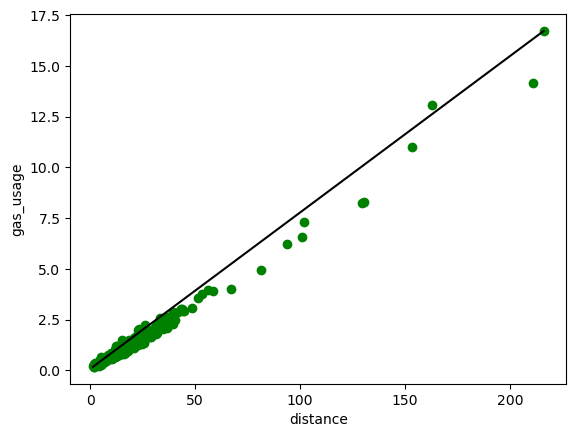

In [48]:
x1 = df_encoded['distance']
y1 = df_encoded['gas_usage']

plt.scatter(x1, y1,color='g')
plt.plot([x1.min(), x1.max()], [y1.min(), y1.max()] , color='k')
plt.xlabel('distance')
plt.ylabel('gas_usage')
plt.show()

array([[<Axes: title={'center': 'distance'}>,
        <Axes: title={'center': 'consume'}>,
        <Axes: title={'center': 'speed'}>,
        <Axes: title={'center': 'temp_inside'}>],
       [<Axes: title={'center': 'temp_outside'}>,
        <Axes: title={'center': 'AC'}>, <Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'sun'}>],
       [<Axes: title={'center': 'gas_type_E10'}>,
        <Axes: title={'center': 'gas_type_SP98'}>,
        <Axes: title={'center': 'gas_usage'}>,
        <Axes: title={'center': 'cost_per_ride'}>],
       [<Axes: title={'center': 'gas_usage_per_km'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

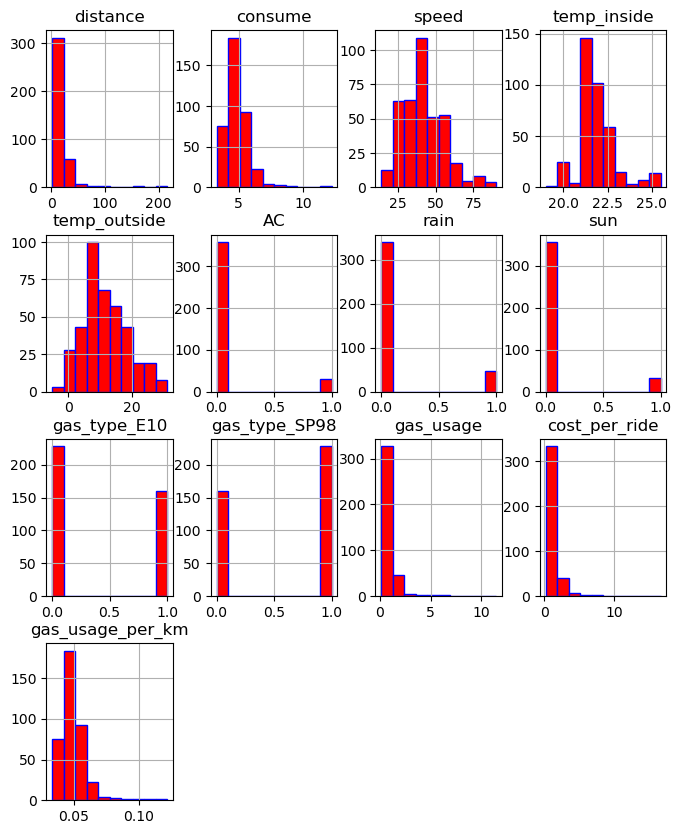

In [44]:
df_encoded.hist(figsize=(8,10),facecolor='red',edgecolor='blue')

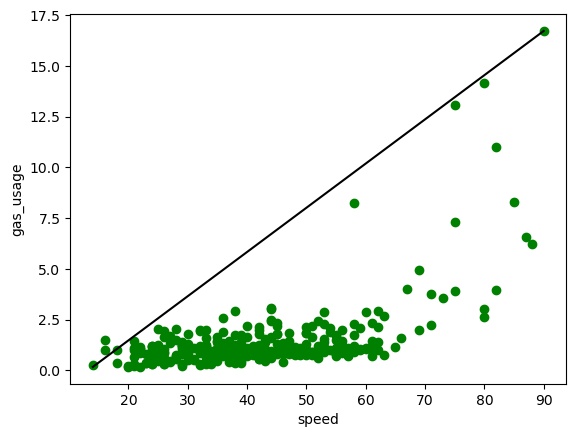

In [64]:
x1 = df_encoded['speed']
y1 = df_encoded['cost_per_ride']

plt.scatter(x1, y1,color='g')
plt.plot([x1.min(), x1.max()], [y1.min(), y1.max()] , color='k')
plt.xlabel('speed')
plt.ylabel('gas_usage')
plt.show()